# Linear regression for Catheter Length

In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
URL = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x02.txt'
response = requests.get(URL)
text = response.text

In [8]:
lines = [line.strip() for line in text.split('\n') if not line.strip().startswith('#')]

In [9]:
lines[:10]

['4 columns',
 '12 rows',
 'Index',
 'Patient Height (inches)',
 'Patient Weight (pounds)',
 'Catheter Length (centimeters)',
 '1  42.8  40.0  37',
 '2  63.5  93.5  50',
 '3  37.5  35.5  34',
 '4  39.5  30.0  36']

In [10]:
columns = ['Index', 'Patient Height', 'Patient Weight', 'Catheter Length']

In [16]:
data = lines[6:-2]

In [34]:
data_a = np.array([row.split() for row in data])
data_a = data_a.astype(np.float)
data_a[:, 1] = data_a[:, 1].astype(np.int)

In [42]:
data_df = pd.DataFrame(data=data_a, columns=columns).set_index('Index')
data_df = data_df.rename(columns={name: name.lower().replace(' ', '_') for name in data_df.keys()})

In [43]:
data_df.head(4)

,patient_height,patient_weight,catheter_length
Index,,,
1.0,42.0,40.0,37.0
2.0,63.0,93.5,50.0
3.0,37.0,35.5,34.0
4.0,39.0,30.0,36.0


In [48]:
data_df.corr()

,patient_height,patient_weight,catheter_length
patient_height,1.000000,0.960965,0.895279
patient_weight,0.960965,1.000000,0.904510
catheter_length,0.895279,0.904510,1.000000


In [53]:
data_df[['patient_height', 'patient_weight']].corrwith(data_df['catheter_length'])

patient_height    0.895279
patient_weight    0.904510
dtype: float64

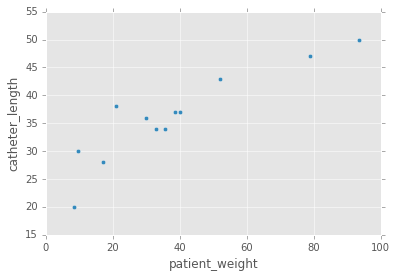

In [54]:
data_df.plot(kind='scatter', x='patient_weight', y='catheter_length')

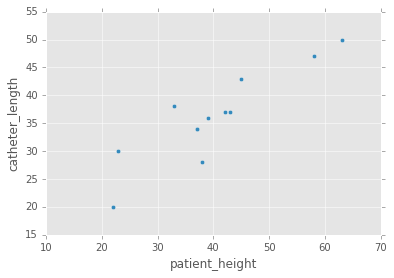

In [56]:
data_df.plot(kind='scatter', x='patient_height', y='catheter_length')

## Model 1: catheter_length ~ patient_weight

In [57]:
import statsmodels.formula.api as sm

result = sm.ols(formula='catheter_length ~ patient_weight', data=data_df).fit()
result.summary()

d:\anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        catheter_length   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     44.99
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           5.32e-05
Time:                        21:02:36   Log-Likelihood:                -31.495
No. Observations:                  12   AIC:                             66.99
Df Residuals:                      10   BIC:                             67.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         25.3441      1.928     13.143      0.000        21.047    29.641
patient_weight     0.2839      0.042      6.707      0.000         0.190     0.378
==============================================================================
Omnibus:                        2.813   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                0.591
Skew:                          -0.325   Prob(JB):                        0.744
Kurtosis:                       3.872   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2: catheter_length ~ patient_height

In [58]:
result = sm.ols(formula='catheter_length ~ patient_height', data=data_df).fit()
result.summary()

d:\anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        catheter_length   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     40.38
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           8.30e-05
Time:                        21:03:32   Log-Likelihood:                -32.020
No. Observations:                  12   AIC:                             68.04
Df Residuals:                      10   BIC:                             69.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         11.6997      4.005      2.921      0.015         2.776    20.623
patient_height     0.6117      0.096      6.355      0.000         0.397     0.826
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.124
Skew:                          -0.225   Prob(JB):                        0.940
Kurtosis:                       2.789   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3: catheter_length ~ patient_height + patient_weight

In [59]:
result = sm.ols(formula='catheter_length ~ patient_height + patient_weight', data=data_df).fit()
result.summary()

d:\anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        catheter_length   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     21.51
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           0.000372
Time:                        21:06:31   Log-Likelihood:                -31.195
No. Observations:                  12   AIC:                             68.39
Df Residuals:                       9   BIC:                             69.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         19.9512      8.177      2.440      0.037         1.454    38.448
patient_height     0.2327      0.342      0.680      0.514        -0.542     1.007
patient_weight     0.1811      0.157      1.152      0.279        -0.175     0.537
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.006
Skew:                          -0.020   Prob(JB):                        0.997
Kurtosis:                       3.100   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

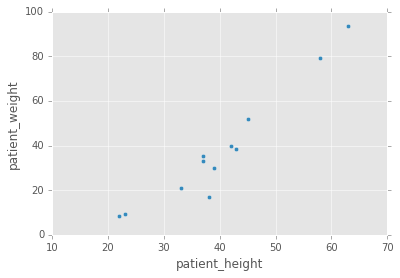

In [61]:
data_df.plot(kind='scatter', x='patient_height', y='patient_weight')